# Toothbrush

In [40]:
import torch
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader
import os
from models import VAE_sigmoid, initialize_weights
from utils import visualize_pixel_distribution, show_8x4_images, plot_training_validation_loss, visualize_reconstruction, plot_and_calculate_losses
from torch.optim.lr_scheduler import ReduceLROnPlateau
from dataset import SingleFolderDataset
from train_model import vae_loss, train_vae
from test_model import calculate_losses_for_category, calculate_metrics


os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [41]:
torch.manual_seed(12)
torch.backends.cudnn.deterministic = True

In [42]:
if torch.cuda.is_available():
    device = 'cuda:0'
    print("[INFO] Current device:", torch.cuda.get_device_name(torch.cuda.current_device()), f", device num:{torch.cuda.current_device()}")
elif torch.has_mps:
    device = 'mps'
    print("[INFO] Current device: MAC OS Metal Performance Shaders.")
else:
    device = 'cpu'
    print("[INFO] Current device: CPU")
    print("*"*50,"\n[WARNING] You may need to change the device to GPU or MPS to get better performance.")
    print("*"*50)
device = torch.device(device)

[INFO] Current device: NVIDIA GeForce RTX 4070 SUPER , device num:0


In [43]:
train_data_path = 'data/train/toothbrush'
val_data_path = 'data/val/toothbrush'
test_data_path = 'data/test/toothbrush'

In [44]:
image_size = 256

learning_rate = 0.0001
batch_size = 32
input_dim=3
feature_dim=64
latent_dim=512

epochs = 500

## Train

In [45]:
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize((0.0, 0.0, 0.0), (1.0, 1.0, 1.0))
])

train_dataset = SingleFolderDataset(folder_path=train_data_path, transform=transform)
val_dataset = SingleFolderDataset(folder_path=val_data_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

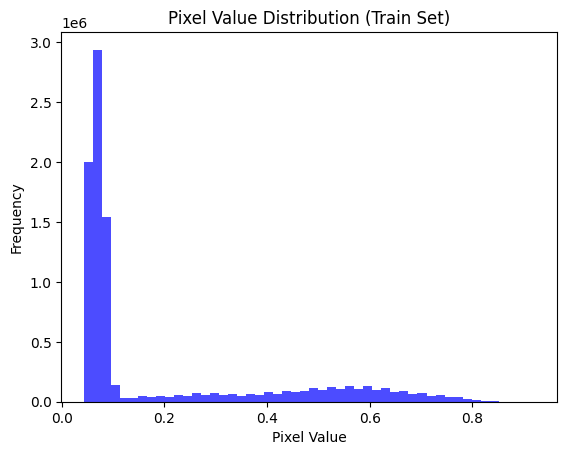

In [46]:
visualize_pixel_distribution(train_loader)

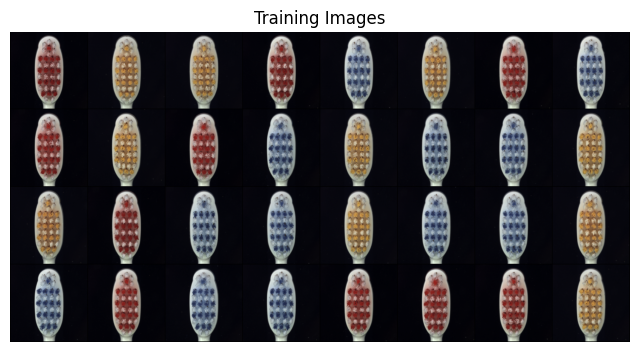

In [47]:
show_8x4_images(train_loader)

In [48]:
vae_sigmoid = VAE_sigmoid(input_dim, feature_dim, latent_dim).to(device)
initialize_weights(vae_sigmoid)

optimizer = optim.Adam(vae_sigmoid.parameters(), lr=learning_rate, weight_decay=1e-4)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, min_lr=1e-6)

train_losses, val_losses = train_vae(vae_sigmoid, train_loader, val_loader, optimizer, scheduler, vae_loss, epochs=epochs, device=device)

Epoch [1/500]: Train Loss: 58287.6680, Val Loss: 28451.8490
Epoch [2/500]: Train Loss: 960541.7500, Val Loss: 28116.6432
Epoch [3/500]: Train Loss: 42166.9779, Val Loss: 27531.0182
Epoch [4/500]: Train Loss: 38560.5964, Val Loss: 26538.2865
Epoch [5/500]: Train Loss: 44410.9440, Val Loss: 25083.7682
Epoch [6/500]: Train Loss: 36195.6146, Val Loss: 23303.7474
Epoch [7/500]: Train Loss: 33378.7090, Val Loss: 21804.6562
Epoch [8/500]: Train Loss: 30743.2370, Val Loss: 20596.6198
Epoch [9/500]: Train Loss: 27369.3958, Val Loss: 19371.8750
Epoch [10/500]: Train Loss: 26287.1562, Val Loss: 18474.4440
Epoch [11/500]: Train Loss: 23612.6270, Val Loss: 17632.3516
Epoch [12/500]: Train Loss: 21953.9766, Val Loss: 16922.0911
Epoch [13/500]: Train Loss: 20650.9655, Val Loss: 16287.9896
Epoch [14/500]: Train Loss: 19742.5104, Val Loss: 15640.8490
Epoch [15/500]: Train Loss: 19022.1784, Val Loss: 14948.1966
Epoch [16/500]: Train Loss: 18230.4622, Val Loss: 14241.8763
Epoch [17/500]: Train Loss: 1773

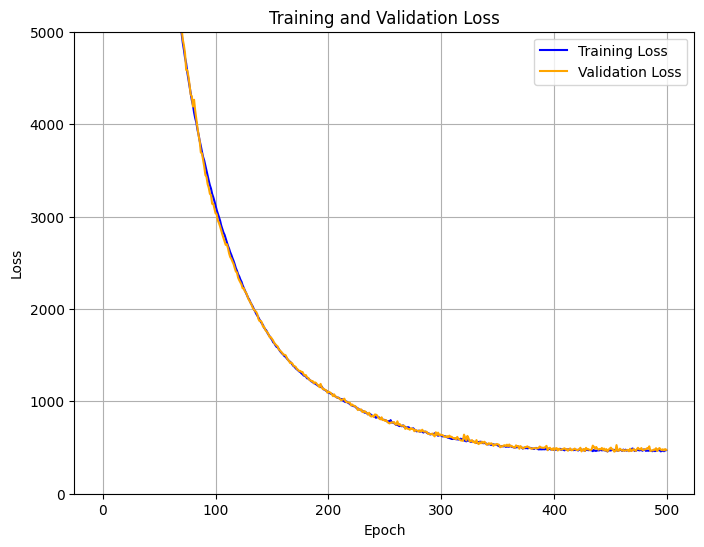

In [49]:
plot_training_validation_loss(train_losses, val_losses, (0, 5000))

In [ ]:
# torch.save(vae_sigmoid.state_dict(), "params/toothbrush_sigmoid.pth")

### 嘗試灰階

In [ ]:
input_dim=1

In [11]:
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.Grayscale(num_output_channels=1),   # 轉為灰階圖像，num_output_channels=1 表示灰階圖像只有一個通道
    transforms.ToTensor(),
    transforms.Normalize((0.0,), (1.0,))
])

train_dataset = SingleFolderDataset(folder_path=train_data_path, transform=transform)
val_dataset = SingleFolderDataset(folder_path=val_data_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

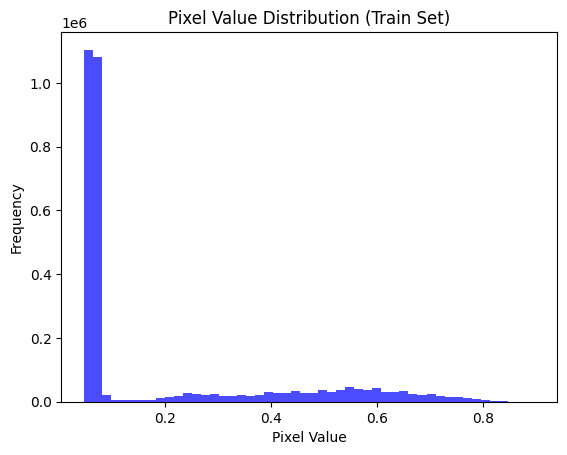

In [12]:
visualize_pixel_distribution(train_loader)

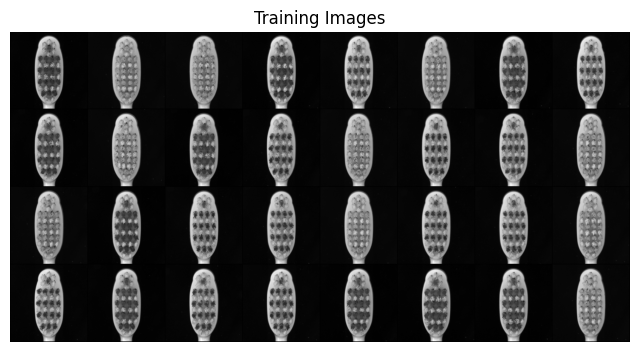

In [13]:
show_8x4_images(train_loader)

In [14]:
model = VAE_sigmoid(input_dim, feature_dim, latent_dim).to(device)
initialize_weights(model)

optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, min_lr=1e-6)

train_losses, val_losses = train_vae(model, train_loader, val_loader, optimizer, scheduler, vae_loss, epochs=epochs, device=device)

Epoch [1/500]: Train Loss: 20869.2871, Val Loss: 9519.3581
Epoch [2/500]: Train Loss: 17021.6139, Val Loss: 9313.6979
Epoch [3/500]: Train Loss: 13277.8747, Val Loss: 9163.1908
Epoch [4/500]: Train Loss: 10152.2764, Val Loss: 9048.9674
Epoch [5/500]: Train Loss: 7805.3353, Val Loss: 8788.9609
Epoch [6/500]: Train Loss: 6129.5527, Val Loss: 8536.3242
Epoch [7/500]: Train Loss: 5055.4186, Val Loss: 8253.4844
Epoch [8/500]: Train Loss: 4367.8978, Val Loss: 7685.2852
Epoch [9/500]: Train Loss: 3914.2721, Val Loss: 6989.1250
Epoch [10/500]: Train Loss: 3578.4898, Val Loss: 6213.7539
Epoch [11/500]: Train Loss: 3312.9055, Val Loss: 5366.0592
Epoch [12/500]: Train Loss: 3083.7497, Val Loss: 5013.4167
Epoch [13/500]: Train Loss: 2894.0243, Val Loss: 4562.6768
Epoch [14/500]: Train Loss: 2720.1984, Val Loss: 4079.5850
Epoch [15/500]: Train Loss: 2580.4032, Val Loss: 3678.5033
Epoch [16/500]: Train Loss: 2451.5442, Val Loss: 3401.5885
Epoch [17/500]: Train Loss: 2341.3044, Val Loss: 3166.4023
Ep

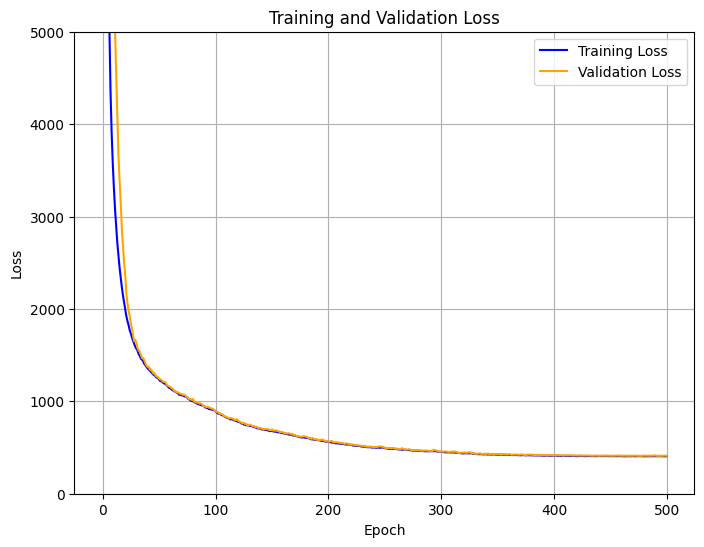

In [15]:
plot_training_validation_loss(train_losses, val_losses, (0, 5000))

In [ ]:
# torch.save(model.state_dict(), "params/toothbrush_gray.pth")

## Test

In [59]:
input_dim=3

In [60]:
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize((0.0, 0.0, 0.0), (1.0, 1.0, 1.0))
])

inverse_transform = transforms.Compose([
    transforms.ToPILImage()  # 轉回 PIL 圖像
])

In [ ]:
model = VAE_sigmoid(input_dim, feature_dim, latent_dim).to(device)
model.load_state_dict(torch.load("params/toothbrush_sigmoid.pth"))

C:\Users\wei\AppData\Local\Temp\ipykernel_8448\434712300.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("params/toothbrush_sigmoid.pth"

<All keys matched successfully>

Error:
loss: 461.0957336425781


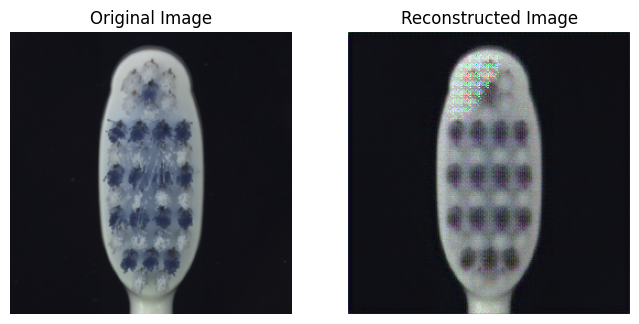

Good:
loss: 457.6235046386719


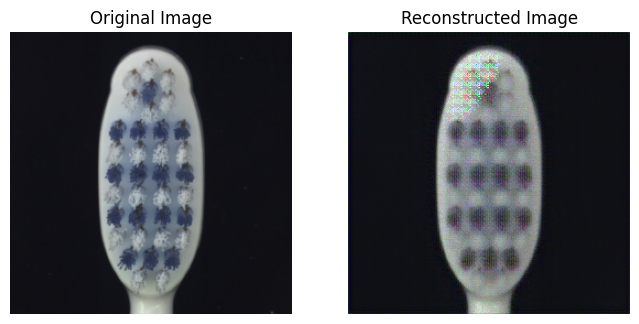

In [64]:
print("Error:")
image_path = "data/test/toothbrush/error/1.png"
visualize_reconstruction(model, vae_loss, image_path, transform, inverse_transform, device)

print("Good:")
image_path = "data/test/toothbrush/good/001.png"
visualize_reconstruction(model, vae_loss, image_path, transform, inverse_transform, device)

good avg:  437.24021911621094
defective avg:  665.1823984781901


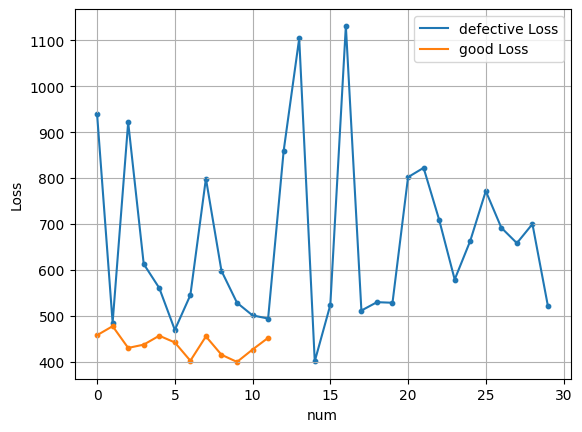

In [65]:
good_losses, error_losses = calculate_losses_for_category(test_data_path, model, vae_loss, transform, device=device)

plot_and_calculate_losses(good_losses, error_losses)

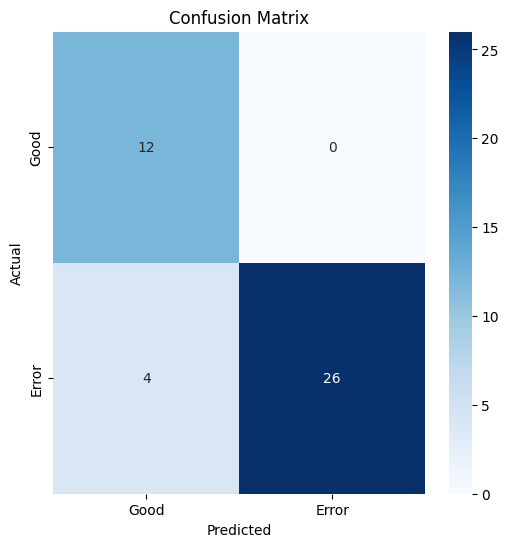

accuracy: 0.9047619047619048, F1 score: 0.9285714285714286


In [66]:
threshold = 480

accuracy, f1_score = calculate_metrics(test_data_path, model, vae_loss, transform, threshold, device=device)
print(f'accuracy: {accuracy}, F1 score: {f1_score}')

### 灰階

In [67]:
input_dim=1

In [68]:
import torchvision.transforms.functional as F

transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.Grayscale(num_output_channels=1),   # 轉為灰階圖像，num_output_channels=1 表示灰階圖像只有一個通道
    transforms.ToTensor(),
    transforms.Normalize((0.0,), (1.0,))
])

inverse_transform = transforms.Compose([
    transforms.Lambda(lambda x: x * 1.0),
    transforms.ToPILImage()
])

In [69]:
model = VAE_sigmoid(input_dim, feature_dim, latent_dim).to(device)
model.load_state_dict(torch.load("params/toothbrush_gray.pth"))

C:\Users\wei\AppData\Local\Temp\ipykernel_8448\605588868.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("params/toothbrush_gray.pth"))


<All keys matched successfully>

Error:
loss: 379.0520935058594


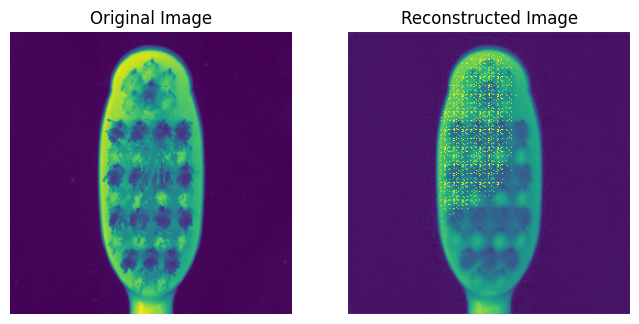

Good:
loss: 369.6811218261719


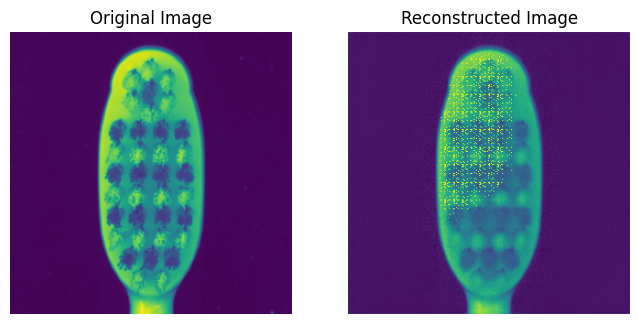

In [70]:
print("Error:")
image_path = "data/test/toothbrush/error/1.png"
visualize_reconstruction(model, vae_loss, image_path, transform, inverse_transform, device)

print("Good:")
image_path = "data/test/toothbrush/good/001.png"
visualize_reconstruction(model, vae_loss, image_path, transform, inverse_transform, device)

good avg:  401.2063293457031
defective avg:  466.30792541503905


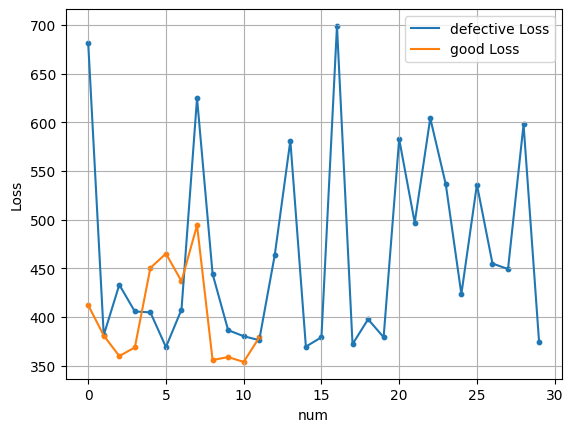

In [71]:
good_losses, error_losses = calculate_losses_for_category(test_data_path, model, vae_loss, transform, device=device)

plot_and_calculate_losses(good_losses, error_losses)

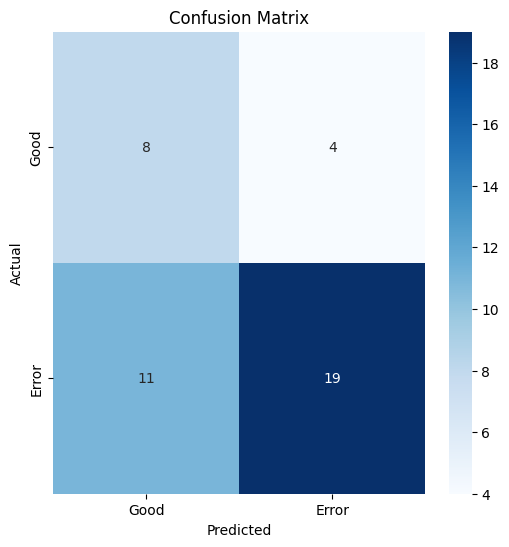

accuracy: 0.6428571428571429, F1 score: 0.7169811320754716


In [72]:
threshold = 400

accuracy, f1_score = calculate_metrics(test_data_path, model, vae_loss, transform, threshold, device=device)
print(f'accuracy: {accuracy}, F1 score: {f1_score}')